## Import Libraries

In [175]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch
import numpy as np

## Scrape Data

In [91]:
base_url = 'https://understat.com/player/'
player = str(input('Please Enter the Player ID: '))
url = base_url + player

Please Enter the Player ID: 8067


In [92]:
url

'https://understat.com/player/8067'

In [93]:
response = requests.get(url)

In [94]:
soup = BeautifulSoup(response.content,'lxml')
scripts = soup.find_all('script')

In [95]:
scripts

[<script>
 			var THEME = localStorage.getItem("theme") || 'DARK';
 			document.body.className = "theme-" + THEME.toLowerCase();
 		</script>,
 <script>
 	var groupsData 		= JSON.parse('\x7B\x22season\x22\x3A\x5B\x7B\x22position\x22\x3A\x22Sub\x22,\x22games\x22\x3A\x2217\x22,\x22goals\x22\x3A\x225\x22,\x22shots\x22\x3A\x2223\x22,\x22time\x22\x3A\x221185\x22,\x22xG\x22\x3A\x222.0194583516567945\x22,\x22assists\x22\x3A\x226\x22,\x22xA\x22\x3A\x224.61812474578619\x22,\x22key_passes\x22\x3A\x2232\x22,\x22season\x22\x3A\x222021\x22,\x22team\x22\x3A\x22Chelsea\x22,\x22yellow\x22\x3A\x224\x22,\x22red\x22\x3A\x221\x22,\x22npg\x22\x3A\x225\x22,\x22npxG\x22\x3A\x222.0194583516567945\x22,\x22xGChain\x22\x3A\x2210.130954971536994\x22,\x22xGBuildup\x22\x3A\x226.998876355588436\x22\x7D,\x7B\x22position\x22\x3A\x22DR\x22,\x22games\x22\x3A\x2232\x22,\x22goals\x22\x3A\x221\x22,\x22shots\x22\x3A\x2235\x22,\x22time\x22\x3A\x222355\x22,\x22xG\x22\x3A\x221.5345969907939434\x22,\x22assists\x22\x3A\x222\x22,

In [96]:
# Get shots data

In [97]:
strings = scripts[3].string

In [98]:
strings

"\n\tvar shotsData \t= JSON.parse('\\x5B\\x7B\\x22id\\x22\\x3A\\x22327360\\x22,\\x22minute\\x22\\x3A\\x2272\\x22,\\x22result\\x22\\x3A\\x22BlockedShot\\x22,\\x22X\\x22\\x3A\\x220.7280000305175781\\x22,\\x22Y\\x22\\x3A\\x220.5479999923706055\\x22,\\x22xG\\x22\\x3A\\x220.020164452493190765\\x22,\\x22player\\x22\\x3A\\x22Reece\\x20James\\x22,\\x22h_a\\x22\\x3A\\x22a\\x22,\\x22player_id\\x22\\x3A\\x228067\\x22,\\x22situation\\x22\\x3A\\x22FromCorner\\x22,\\x22season\\x22\\x3A\\x222019\\x22,\\x22shotType\\x22\\x3A\\x22RightFoot\\x22,\\x22match_id\\x22\\x3A\\x2211735\\x22,\\x22h_team\\x22\\x3A\\x22Burnley\\x22,\\x22a_team\\x22\\x3A\\x22Chelsea\\x22,\\x22h_goals\\x22\\x3A\\x222\\x22,\\x22a_goals\\x22\\x3A\\x224\\x22,\\x22date\\x22\\x3A\\x222019\\x2D10\\x2D26\\x2017\\x3A30\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Callum\\x20Hudson\\x2DOdoi\\x22,\\x22lastAction\\x22\\x3A\\x22Pass\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22333638\\x22,\\x22minute\\x22\\x3A\\x2281\\x22,\\x22result\\x22\\x3A\\x22M

In [99]:
ind_start = strings.index("('") + 2 
ind_end = strings.index("')")

json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')

data = json.loads(json_data)

In [100]:
data

[{'id': '327360',
  'minute': '72',
  'result': 'BlockedShot',
  'X': '0.7280000305175781',
  'Y': '0.5479999923706055',
  'xG': '0.020164452493190765',
  'player': 'Reece James',
  'h_a': 'a',
  'player_id': '8067',
  'situation': 'FromCorner',
  'season': '2019',
  'shotType': 'RightFoot',
  'match_id': '11735',
  'h_team': 'Burnley',
  'a_team': 'Chelsea',
  'h_goals': '2',
  'a_goals': '4',
  'date': '2019-10-26 17:30:00',
  'player_assisted': 'Callum Hudson-Odoi',
  'lastAction': 'Pass'},
 {'id': '333638',
  'minute': '81',
  'result': 'MissedShots',
  'X': '0.745',
  'Y': '0.35700000762939454',
  'xG': '0.018196946009993553',
  'player': 'Reece James',
  'h_a': 'h',
  'player_id': '8067',
  'situation': 'OpenPlay',
  'season': '2019',
  'shotType': 'RightFoot',
  'match_id': '11774',
  'h_team': 'Chelsea',
  'a_team': 'West Ham',
  'h_goals': '0',
  'a_goals': '1',
  'date': '2019-11-30 15:00:00',
  'player_assisted': 'Mateo Kovacic',
  'lastAction': 'Pass'},
 {'id': '335463',
  

In [101]:
x =[]
y = []
xG =[]
shot_result =[]
home_team = []
away_team = []
shot_type = []
season = []
data_final = []

for i in data:
    x.append(i['X'])
    y.append(i['Y'])
    xG.append(i['xG'])
    shot_result.append(i['result'])
    shot_type.append(i['shotType'])
    away_team.append(i['a_team'])
    home_team.append(i['h_team'])
    season.append(i['season'])
    

    

In [221]:
x_array = np.array(x, dtype = 'float64')
x_array = x_array * 120
x_list = x_array.tolist()

y_array = np.array(y, dtype = 'float64')
y_array = y_array * 80
y_list = y_array.tolist()


In [222]:
x_list


[87.36000366210938,
 89.4,
 109.80000000000001,
 107.88000183105468,
 103.31999816894532,
 98.76000366210937,
 97.08000183105469,
 108.36000366210938,
 99.0,
 98.39999999999999,
 108.83999633789062,
 96.71999816894531,
 92.5199981689453,
 86.63999633789062,
 94.2,
 93.96000366210939,
 95.16000366210938,
 110.28000183105469,
 89.28000183105469,
 101.39999999999999,
 90.48000183105468,
 98.5199981689453,
 96.60000000000001,
 87.23999633789062,
 98.5199981689453,
 86.63999633789062,
 106.8,
 104.4,
 86.03999633789061,
 98.5199981689453,
 92.28000183105468,
 82.2,
 84.4800018310547,
 96.23999633789063,
 113.88000183105468,
 112.43999633789063,
 112.68000183105468,
 102.71999816894532,
 107.03999633789063,
 105.23999633789063,
 101.03999633789061,
 111.71999816894531,
 105.36000366210938,
 99.83999633789062,
 91.3199981689453,
 110.4,
 98.16000366210938,
 106.91999816894531,
 95.28000183105469,
 99.4800018310547,
 97.43999633789063,
 88.91999816894531,
 89.03999633789063,
 93.83999633789062

In [223]:
col_names = ['x','y','xG','shot_result','shot_type','home_team','away_team','season', 'new_x', 'new_y']
data_df = pd.DataFrame([x,y,xG,shot_result,shot_type,home_team,away_team,season,x_list, y_list], index= col_names)
data_df = df.T

In [224]:
data_df

,x,y,xG,shot_result,shot_type,home_team,away_team,season
0,0.7280000305175781,0.5479999923706055,0.020164452493190765,BlockedShot,RightFoot,Burnley,Chelsea,2019
1,0.745,0.35700000762939454,0.018196946009993553,MissedShots,RightFoot,Chelsea,West Ham,2019
2,0.915,0.5879999923706055,0.061237238347530365,MissedShots,RightFoot,Everton,Chelsea,2019
3,0.899000015258789,0.40200000762939453,0.12172402441501617,BlockedShot,RightFoot,Tottenham,Chelsea,2019
4,0.860999984741211,0.2879999923706055,0.036330290138721466,MissedShots,RightFoot,Brighton,Chelsea,2019
...,...,...,...,...,...,...,...,...
72,0.73,0.5329999923706055,0.013116554357111454,MissedShots,RightFoot,Chelsea,Everton,2021
73,0.12100000381469726,0.3079999923706055,0,OwnGoal,Head,Aston Villa,Chelsea,2021
74,0.7609999847412109,0.6840000152587891,0.050480056554079056,MissedShots,RightFoot,Aston Villa,Chelsea,2021
75,0.9230000305175782,0.36900001525878906,0.06362634152173996,BlockedShot,RightFoot,Burnley,Chelsea,2021


In [225]:
data_df['new_x'] = x_list
data_df['new_y'] = y_list

In [284]:
data_df.drop(data_df[data_df['new_x'] == 14.52].index, inplace = True)

In [227]:
df.to_csv('reecejames.csv')

In [285]:
data_df

,x,y,xG,shot_result,shot_type,home_team,away_team,season,new_x,new_y
0,0.7280000305175781,0.5479999923706055,0.020164452493190765,BlockedShot,RightFoot,Burnley,Chelsea,2019,87.360004,43.839999
1,0.745,0.35700000762939454,0.018196946009993553,MissedShots,RightFoot,Chelsea,West Ham,2019,89.400000,28.560001
2,0.915,0.5879999923706055,0.061237238347530365,MissedShots,RightFoot,Everton,Chelsea,2019,109.800000,47.039999
3,0.899000015258789,0.40200000762939453,0.12172402441501617,BlockedShot,RightFoot,Tottenham,Chelsea,2019,107.880002,32.160001
4,0.860999984741211,0.2879999923706055,0.036330290138721466,MissedShots,RightFoot,Brighton,Chelsea,2019,103.319998,23.039999
...,...,...,...,...,...,...,...,...,...,...
72,0.73,0.5329999923706055,0.013116554357111454,MissedShots,RightFoot,Chelsea,Everton,2021,87.600000,42.639999
73,0.12100000381469726,0.3079999923706055,0,OwnGoal,Head,Aston Villa,Chelsea,2021,14.520000,24.639999
74,0.7609999847412109,0.6840000152587891,0.050480056554079056,MissedShots,RightFoot,Aston Villa,Chelsea,2021,91.319998,54.720001
75,0.9230000305175782,0.36900001525878906,0.06362634152173996,BlockedShot,RightFoot,Burnley,Chelsea,2021,110.760004,29.520001


## Data Visualization

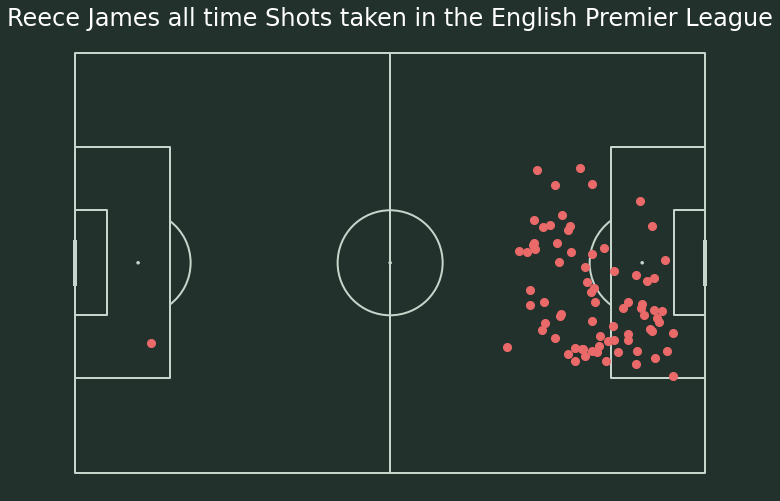

In [294]:

fig, ax = plt.subplots(figsize=(13,8.5))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#The statsbomb pitch from mplsoccer
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', 
              line_color='#c7d5cc', figsize=(20, 12),
              constrained_layout=False, tight_layout=True )

pitch.draw(ax=ax)

#I invert the axis to make it so I am viewing it how I want
plt.gca().invert_yaxis()


plt.scatter(data_df['new_x'],data_df['new_y'], s=65,c='#ea6969',alpha=1)

    
plt.title('Reece James all time Shots taken in the English Premier League',fontsize = 24, c='w')


<Figure size 432x288 with 0 Axes>